In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
%matplotlib inline

In [3]:
ale_df = pd.read_csv("../Data/Growth_data/evolved-isolate-growth-data/Evolved_isolates_data_frame.tsv", sep="\t")

In [4]:
recon_df = pd.read_csv("../Data/Growth_data/Reconstructions/Reconstruction_replicate_growth.csv", index_col=0)

comp_list = ["HMDA", "PUTR", "12PD", "23BD", "GLUT", "ADIP", "HEXA", "OCTA", "IBUA", "COUM", "BUT"]
for comp in comp_list:
    recon_df = recon_df[~recon_df["strain"].str.startswith(comp)]
    
recon_df["replicate"] = recon_df["strain"]
recon_df["strain"] = recon_df["replicate"].map(lambda x: x[:-2])

In [5]:
def prettify(s):
    if s == s.upper():
        return s
    else:
        return s.capitalize()

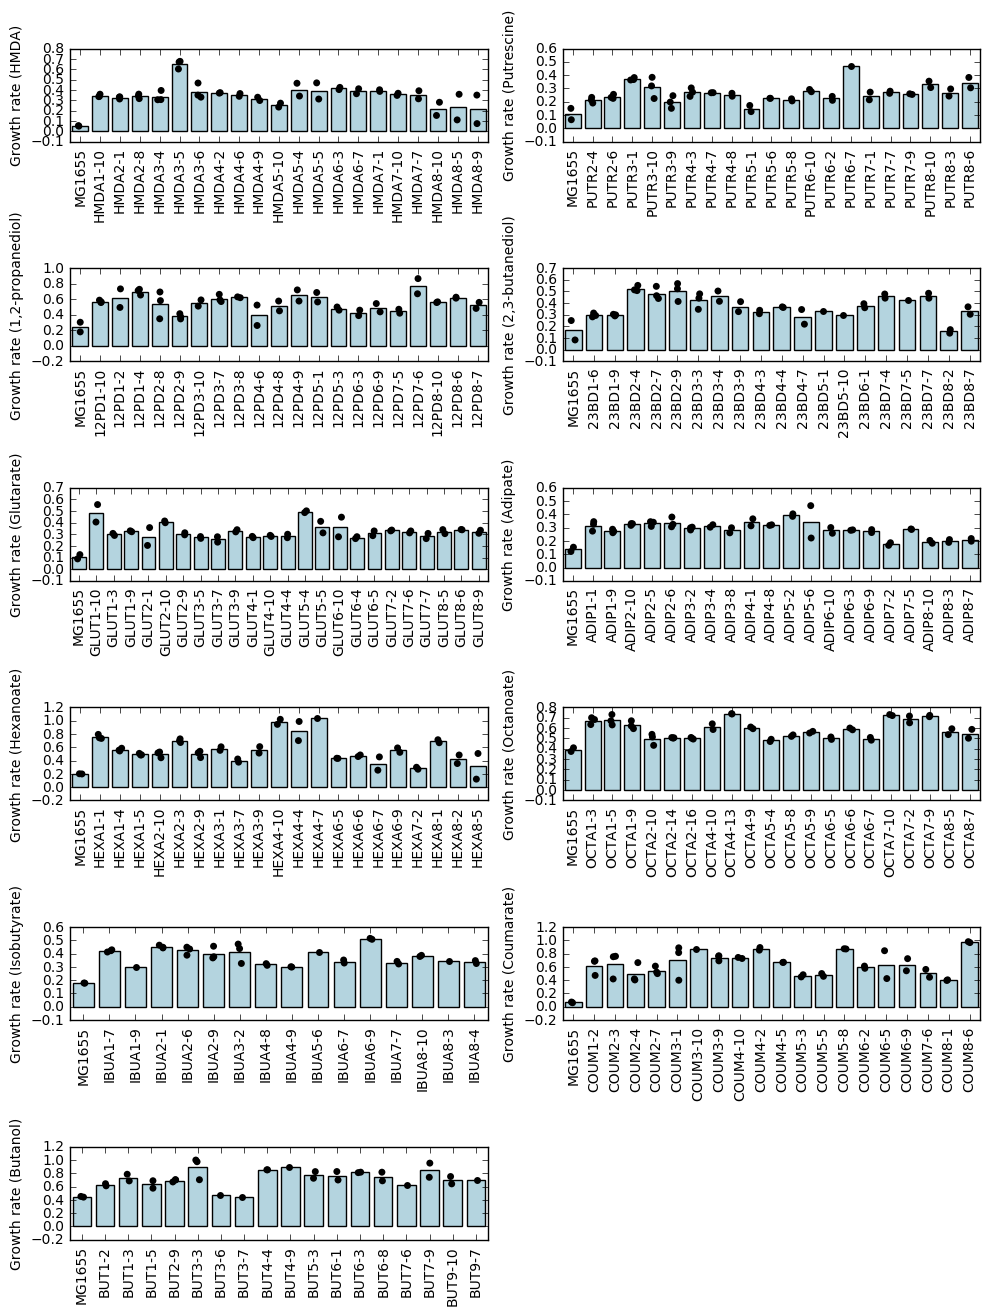

In [6]:
comp_order = [
    "HMDA", "putrescine", "1,2-propanediol", "2,3-butanediol", "glutarate", "adipate",
    "hexanoate", "octanoate", "isobutyrate", "coumarate", "butanol"
]


plt.figure(figsize=[10, 13])

for i, comp in enumerate(comp_order):
    plt.subplot(6, 2, (i % 12)+1)
    comp_df = ale_df[ale_df["compound"] == comp]
    comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="growth_rate", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90)
    sbn.stripplot(x="strain", y="growth_rate", data=comp_df, color="black")
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)))

plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 5 - Evolved tolerance.pdf")

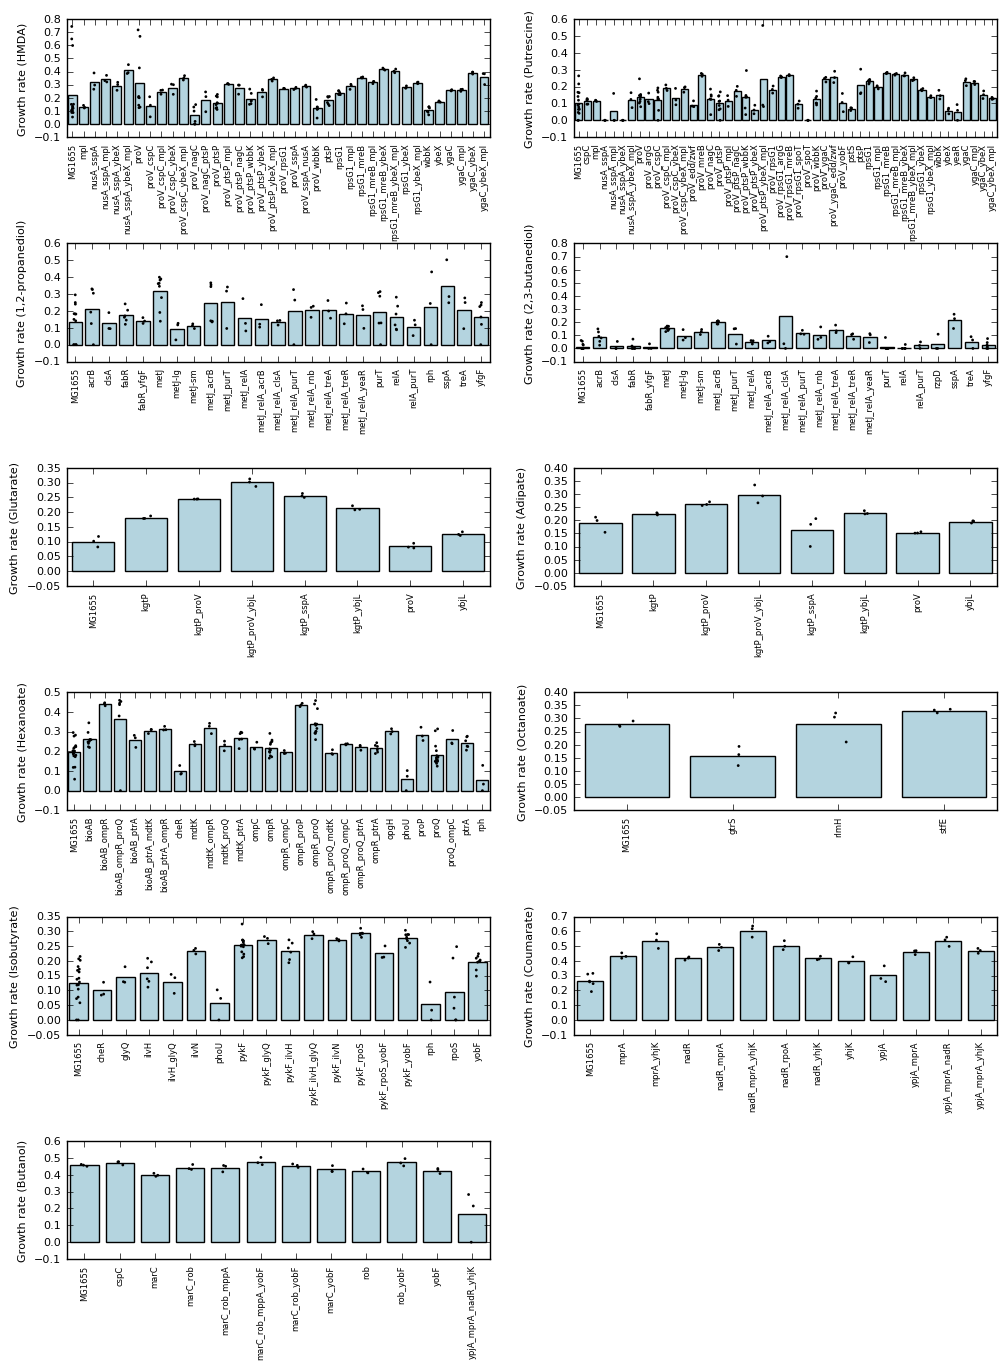

In [7]:
plt.figure(figsize=[12, 16])

for i, comp in enumerate(comp_order):
    plt.subplot(6, 2, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=6)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=2)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
    plt.yticks(fontsize=8)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.pdf")